In [1]:
import numpy as np
from typing import List 

In [2]:
def simulation(true_category_prob: List[float], pred_category_prob: List[float], sample_size:int = 10000)->float:
    category_sampling = lambda category_prob: np.where(np.random.multinomial(1, category_prob, size=sample_size) == 1)[1]

    sample: np.ndarray = category_sampling(true_category_prob)
    prediction: np.ndarray = category_sampling(pred_category_prob)

    compare_array = list(sample == prediction)
    
    return compare_array.count(True)/sample_size

simulation([0.2, 0.3, 0.5], [0.2, 0.3, 0.5])

0.3825

## サンプル数を変えた場合の精度確認

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

26.7 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


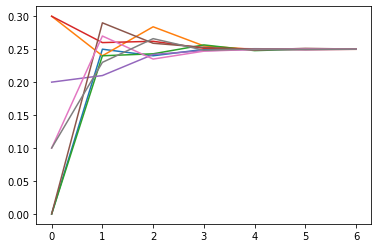

In [4]:
%%timeit
accuracy_uniform = [simulation([0.25]*4, [0.25]*4, 10**n) for n in range(1,8)]
plt.plot(accuracy_uniform)

21.1 s ± 2.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


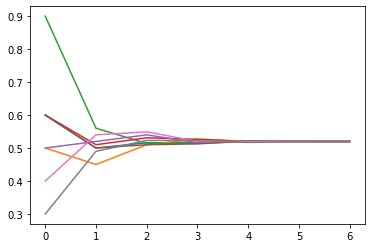

In [5]:
%%timeit 
accuracy_biased = [simulation([0.1, 0.1, 0.1, 0.7], [0.1, 0.1, 0.1, 0.7], 10**n) for n in range(1,8)]
plt.plot(accuracy_biased)